# Stock Price Prediction Analysis

This notebook demonstrates stock price prediction using machine learning.

## Steps:
1. Data Collection
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Training
5. Evaluation
6. Predictions

In [1]:
# Import libraries
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from src.data_collector import StockDataCollector
from src.feature_engineering import FeatureEngineer
from src.models import LinearRegressionModel, RandomForestModel, XGBoostModel
from src.visualizer import StockVisualizer

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

2025-09-30 15:09:00.880436: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-30 15:09:00.984136: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-30 15:09:04.151219: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


## 1. Data Collection

Fetch historical stock data from Yahoo Finance.

In [2]:
# Initialize data collector
collector = StockDataCollector(data_dir='../data')

# Fetch stock data
TICKER = 'AAPL'  # Change this to any stock ticker
PERIOD = '5y'     # 5 years of data

df = collector.fetch_stock_data(TICKER, period=PERIOD)
print(f"Data shape: {df.shape}")
df.head()

Fetching data for AAPL...
Data saved to ../data/AAPL_5y_1d.csv
Data shape: (1256, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-30 00:00:00-04:00,110.685557,114.060889,110.520197,112.650444,142675200,0.0,0.0
2020-10-01 00:00:00-04:00,114.430507,114.508326,112.669891,113.603699,116120400,0.0,0.0
2020-10-02 00:00:00-04:00,109.810134,112.222478,109.158415,109.936584,144712000,0.0,0.0
2020-10-05 00:00:00-04:00,110.802289,113.467534,110.452110,113.321625,106243800,0.0,0.0
2020-10-06 00:00:00-04:00,112.543458,112.952006,109.187585,110.072762,161498200,0.0,0.0


In [3]:
# Get stock information
info = collector.get_stock_info(TICKER)
for key, value in info.items():
    print(f"{key}: {value}")

symbol: AAPL
name: Apple Inc.
sector: Technology
industry: Consumer Electronics
market_cap: 3802748420096
current_price: 255.21
52_week_high: 260.1
52_week_low: 169.21
pe_ratio: 38.903965
dividend_yield: 0.41


## 2. Exploratory Data Analysis

In [4]:
# Basic statistics
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03,1256.000000,1256.0
mean,171.767974,173.663143,170.043683,171.943668,7.338673e+07,0.003734,0.0
std,36.613289,36.874265,36.400742,36.693946,3.201480e+07,0.029435,0.0
min,106.133241,107.660408,104.392075,105.802513,9.659829e+06,0.000000,0.0
25%,142.929450,144.616373,141.383814,143.076477,5.022548e+07,0.000000,0.0
50%,168.554553,170.279565,167.321743,168.805779,6.622780e+07,0.000000,0.0
75%,197.001417,199.480607,194.853264,197.172375,8.881640e+07,0.000000,0.0
max,257.276679,259.179926,256.718662,258.103729,3.186799e+08,0.260000,0.0


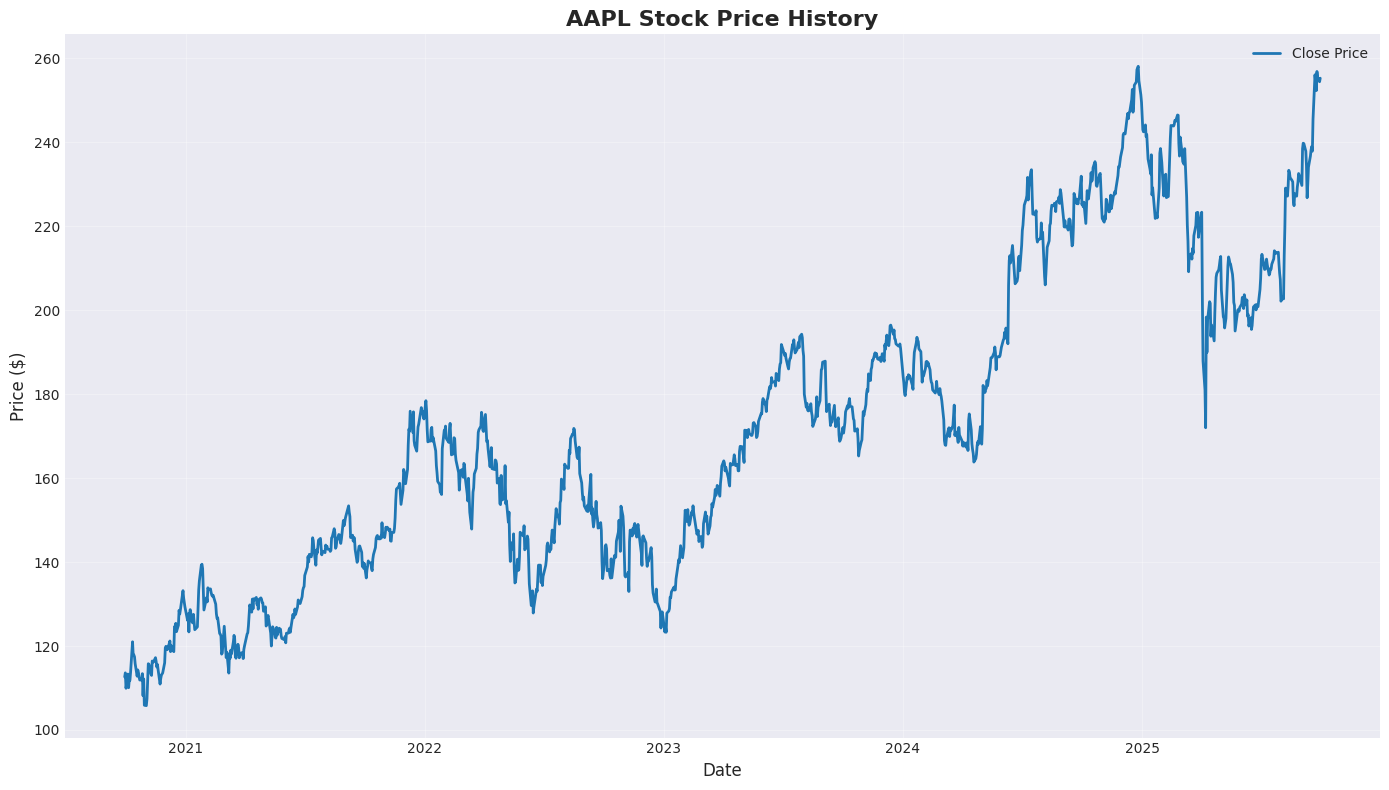

In [5]:
# Initialize visualizer
viz = StockVisualizer()

# Plot stock price
viz.plot_stock_price(df, TICKER)

In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


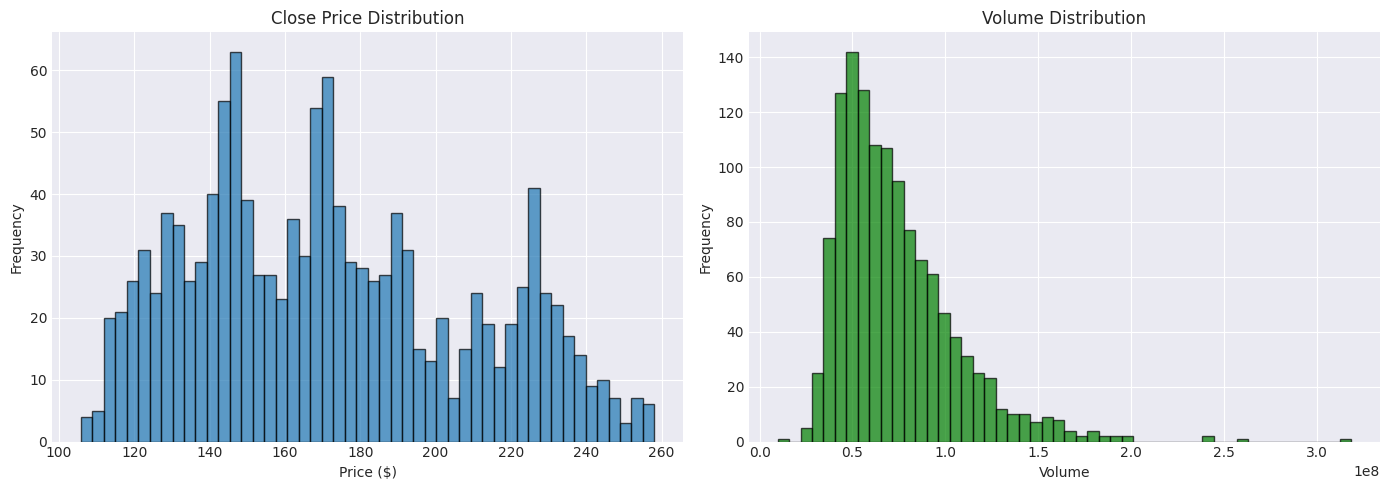

In [7]:
# Price distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['Close'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Close Price Distribution')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['Volume'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_title('Volume Distribution')
axes[1].set_xlabel('Volume')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 3. Feature Engineering

Create technical indicators and features.

In [8]:
# Create features
engineer = FeatureEngineer(df)
engineer.add_all_features()
features_df = engineer.get_feature_dataframe()

print(f"Features shape: {features_df.shape}")
print(f"\nFeature names: {engineer.get_feature_names()}")

Adding technical indicators...
Removed 200 rows with NaN values
Features shape: (1056, 38)

Feature names: ['Dividends', 'Stock Splits', 'SMA_5', 'EMA_5', 'SMA_10', 'EMA_10', 'SMA_20', 'EMA_20', 'SMA_50', 'EMA_50', 'SMA_200', 'EMA_200', 'RSI', 'MACD', 'MACD_signal', 'MACD_diff', 'BB_upper', 'BB_middle', 'BB_lower', 'BB_width', 'Stoch', 'Stoch_signal', 'ATR', 'OBV', 'Price_Change', 'Price_Change_1d', 'Price_Change_5d', 'Price_Change_20d', 'Volume_Change', 'Volume_MA_5', 'Volume_MA_20']


In [9]:
# Display features
features_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_5,EMA_5,SMA_10,EMA_10,SMA_20,EMA_20,SMA_50,EMA_50,SMA_200,EMA_200,RSI,MACD,MACD_signal,MACD_diff,BB_upper,BB_middle,BB_lower,BB_width,Stoch,Stoch_signal,ATR,OBV,Price_Change,Price_Change_1d,Price_Change_5d,Price_Change_20d,Volume_Change,Volume_MA_5,Volume_MA_20,Target,Target_Change
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025-09-23 00:00:00-04:00,255.880005,257.339996,253.580002,254.429993,60275200,0.0,0.0,246.575998,248.318975,239.861998,243.335471,237.150500,238.069672,225.652403,228.381040,221.367678,218.675659,72.324859,6.376207,4.856391,1.519816,252.183627,237.150500,222.117372,12.678133,90.729520,94.991171,5.165130,2050173900,-0.006443,-0.006443,0.068360,0.120047,-0.428765,84058300.0,60372500.0,252.309998,-0.833233
2025-09-24 00:00:00-04:00,255.220001,255.740005,251.039993,252.309998,42303700,0.0,0.0,249.239996,249.649316,242.413998,244.967203,238.300500,239.425894,226.521144,229.319431,221.418476,219.010329,68.918706,6.723994,5.229912,1.494083,254.249553,238.300500,222.351446,13.385665,83.975792,90.960174,5.131907,2007870200,-0.008332,-0.008332,0.055735,0.100301,-0.298157,83217440.0,59758930.0,256.869995,1.807300
2025-09-25 00:00:00-04:00,253.210007,257.170013,251.710007,256.869995,55202100,0.0,0.0,253.037994,252.056209,245.097998,247.131347,239.619499,241.087237,227.460109,230.399845,221.491925,219.387042,71.975898,7.283611,5.640652,1.642960,257.060191,239.619499,222.178807,14.556989,98.502704,91.069339,5.155343,2063072300,0.018073,0.018073,0.079830,0.114452,0.304900,85407940.0,60956060.0,255.460007,-0.548911
2025-09-26 00:00:00-04:00,254.100006,257.600006,253.779999,255.460007,46076300,0.0,0.0,255.029996,253.190808,247.236998,248.645649,240.764500,242.456072,228.373670,231.382596,221.559320,219.745977,69.693194,7.526576,6.017836,1.508740,259.180543,240.764500,222.348456,15.297972,93.238550,91.905682,5.059962,2016996000,-0.005489,-0.005489,0.040570,0.098469,-0.165316,61874940.0,61356140.0,254.429993,-0.403200
2025-09-29 00:00:00-04:00,254.559998,255.000000,253.009995,254.429993,40091100,0.0,0.0,254.699997,253.603870,249.009998,249.697348,241.878999,243.596445,229.243458,232.286416,221.602084,220.091092,67.996660,7.548993,6.324068,1.224926,260.764310,241.878999,222.993689,15.615502,89.984163,93.908472,4.873537,1976904900,-0.004032,-0.004032,-0.006443,0.096020,-0.129898,48789680.0,61389775.0,255.270004,0.330154


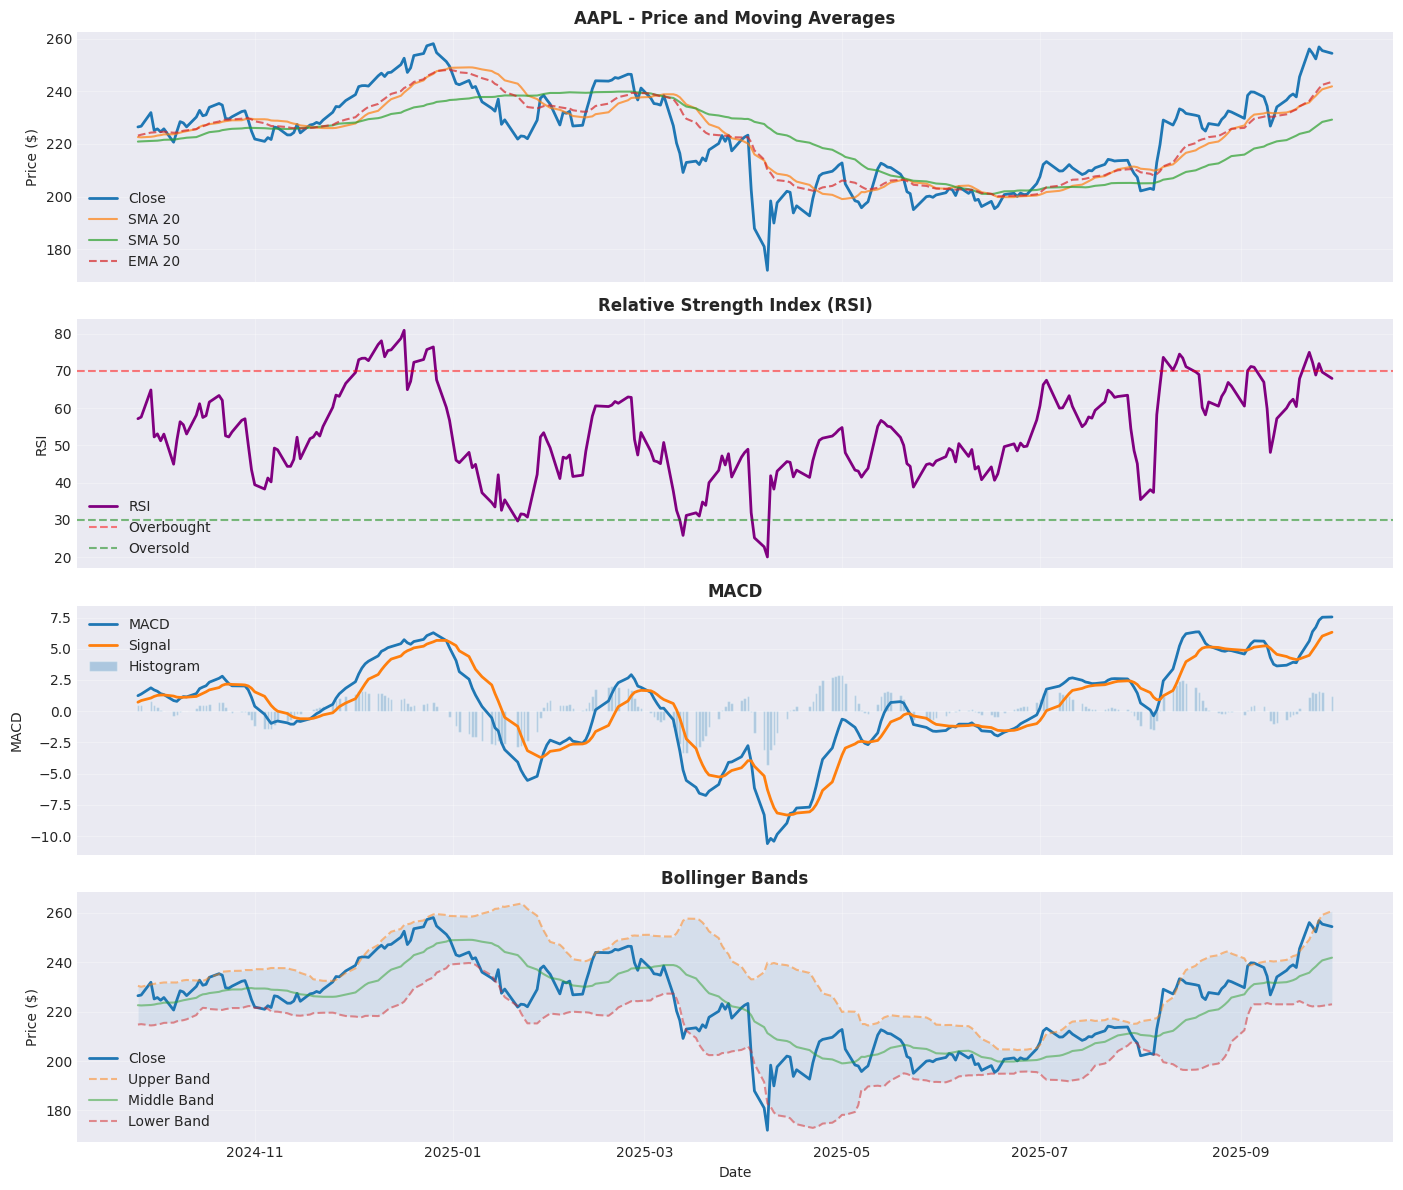

In [10]:
# Visualize technical indicators
viz.plot_technical_indicators(features_df.tail(252), TICKER)  # Last year

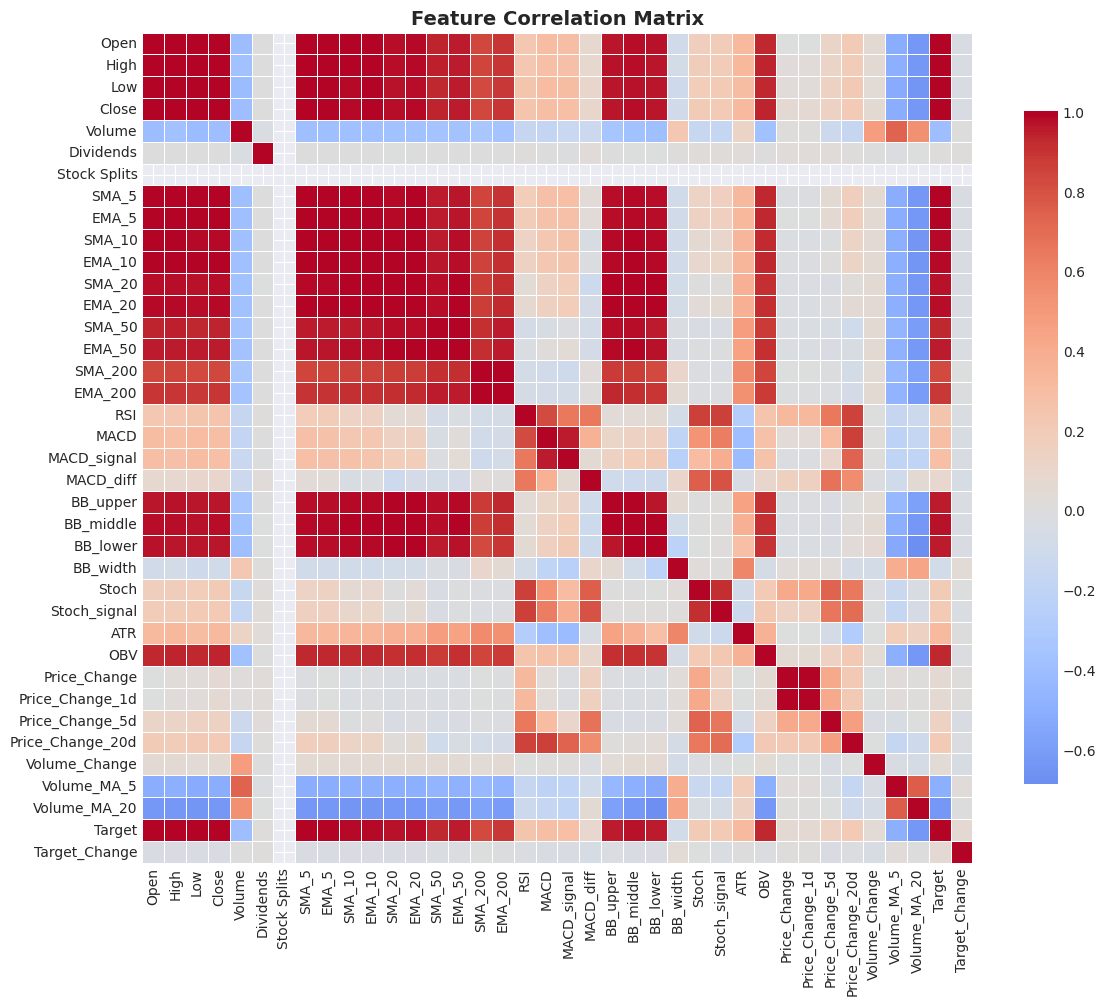

In [11]:
# Correlation matrix
viz.plot_correlation_matrix(features_df)

## 4. Model Training

Train multiple machine learning models.

In [12]:
# Get feature names
feature_names = engineer.get_feature_names()
print(f"Number of features: {len(feature_names)}")

Number of features: 31


### Linear Regression

In [13]:
# Train Linear Regression
lr_model = LinearRegressionModel(model_dir='../models')
X_train, X_test, y_train, y_test = lr_model.prepare_data(features_df, feature_names)

lr_model.train(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_metrics = lr_model.evaluate(y_test, lr_pred)

print("Linear Regression Metrics:")
for key, value in lr_metrics.items():
    print(f"  {key}: {value:.4f}")

Training Linear Regression model...
Training completed!
Linear Regression Metrics:
  RMSE: 4.7470
  MAE: 3.3062
  R2: 0.9343
  MAPE: 1.5293


### Random Forest

In [14]:
# Train Random Forest
rf_model = RandomForestModel(n_estimators=100, max_depth=15, model_dir='../models')
X_train, X_test, y_train, y_test = rf_model.prepare_data(features_df, feature_names)

rf_model.train(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_metrics = rf_model.evaluate(y_test, rf_pred)

print("Random Forest Metrics:")
for key, value in rf_metrics.items():
    print(f"  {key}: {value:.4f}")

Training Random Forest model...
Training completed!
Random Forest Metrics:
  RMSE: 14.2943
  MAE: 12.0889
  R2: 0.4039
  MAPE: 5.4528


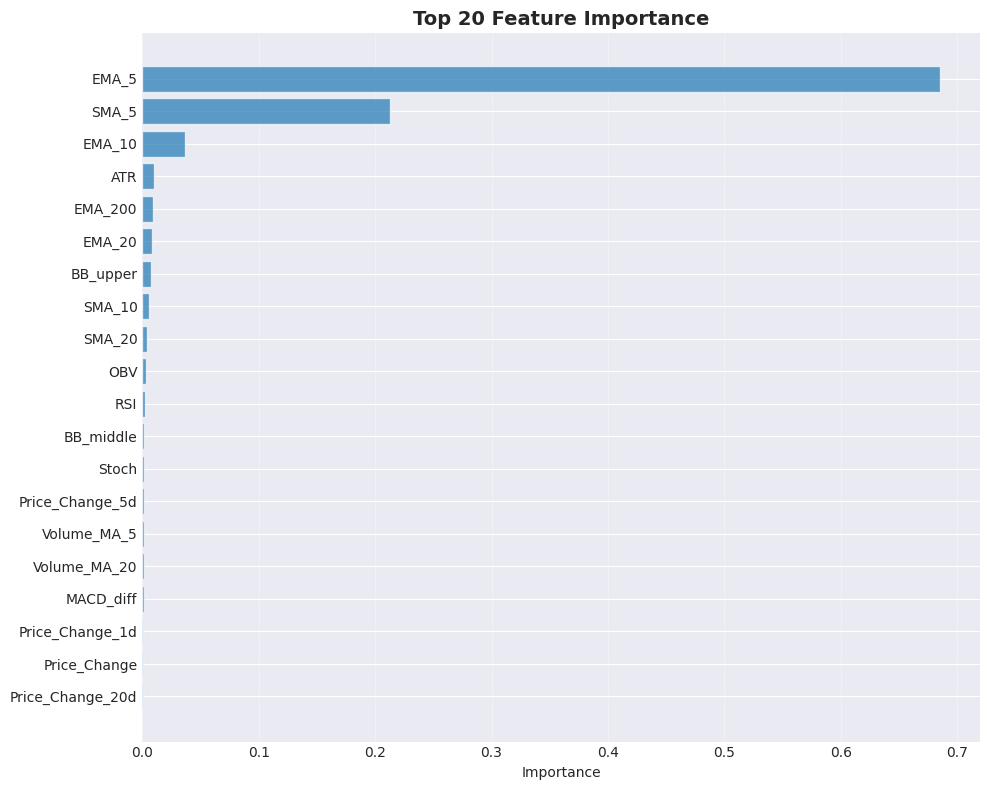

In [15]:
# Feature importance
importance = rf_model.get_feature_importance()
viz.plot_feature_importance(importance, top_n=20)

### XGBoost

In [16]:
# Train XGBoost
xgb_model = XGBoostModel(n_estimators=100, learning_rate=0.1, max_depth=6, model_dir='../models')
X_train, X_test, y_train, y_test = xgb_model.prepare_data(features_df, feature_names)

xgb_model.train(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_metrics = xgb_model.evaluate(y_test, xgb_pred)

print("XGBoost Metrics:")
for key, value in xgb_metrics.items():
    print(f"  {key}: {value:.4f}")

Training XGBoost model...
Training completed!
XGBoost Metrics:
  RMSE: 15.2069
  MAE: 11.8472
  R2: 0.3253
  MAPE: 5.1783


## 5. Model Comparison

In [17]:
# Compare all models
results = {
    'Linear Regression': lr_metrics,
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics
}

comparison_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(comparison_df)

# Best model
best_model = comparison_df['R2'].idxmax()
print(f"\n🏆 Best Model: {best_model} (R² = {comparison_df.loc[best_model, 'R2']:.4f})")


Model Comparison:
                        RMSE        MAE        R2      MAPE
Linear Regression   4.746973   3.306221  0.934257  1.529314
Random Forest      14.294335  12.088884  0.403868  5.452814
XGBoost            15.206877  11.847219  0.325325  5.178317

🏆 Best Model: Linear Regression (R² = 0.9343)


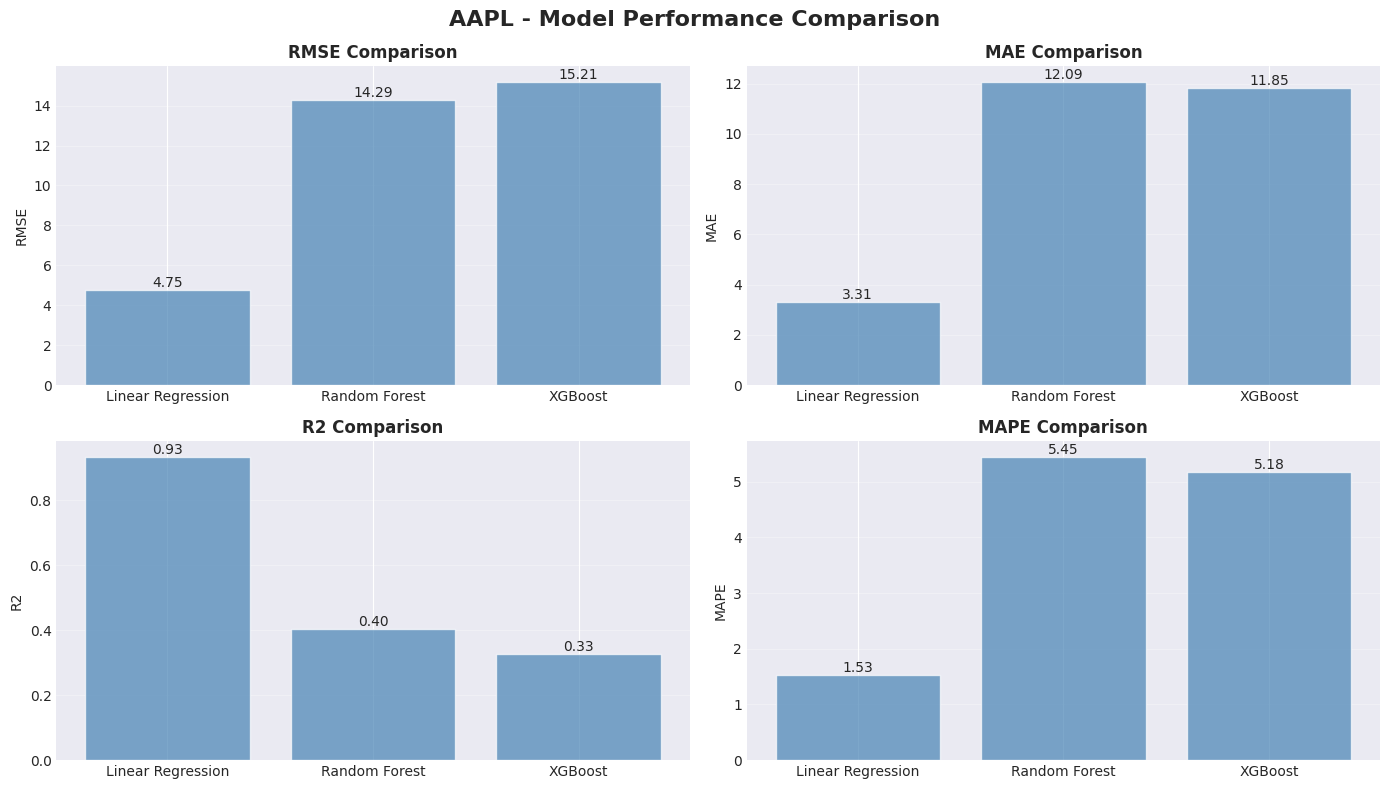

In [18]:
# Visualize comparison
viz.plot_model_comparison(results, TICKER)

## 6. Visualization of Predictions

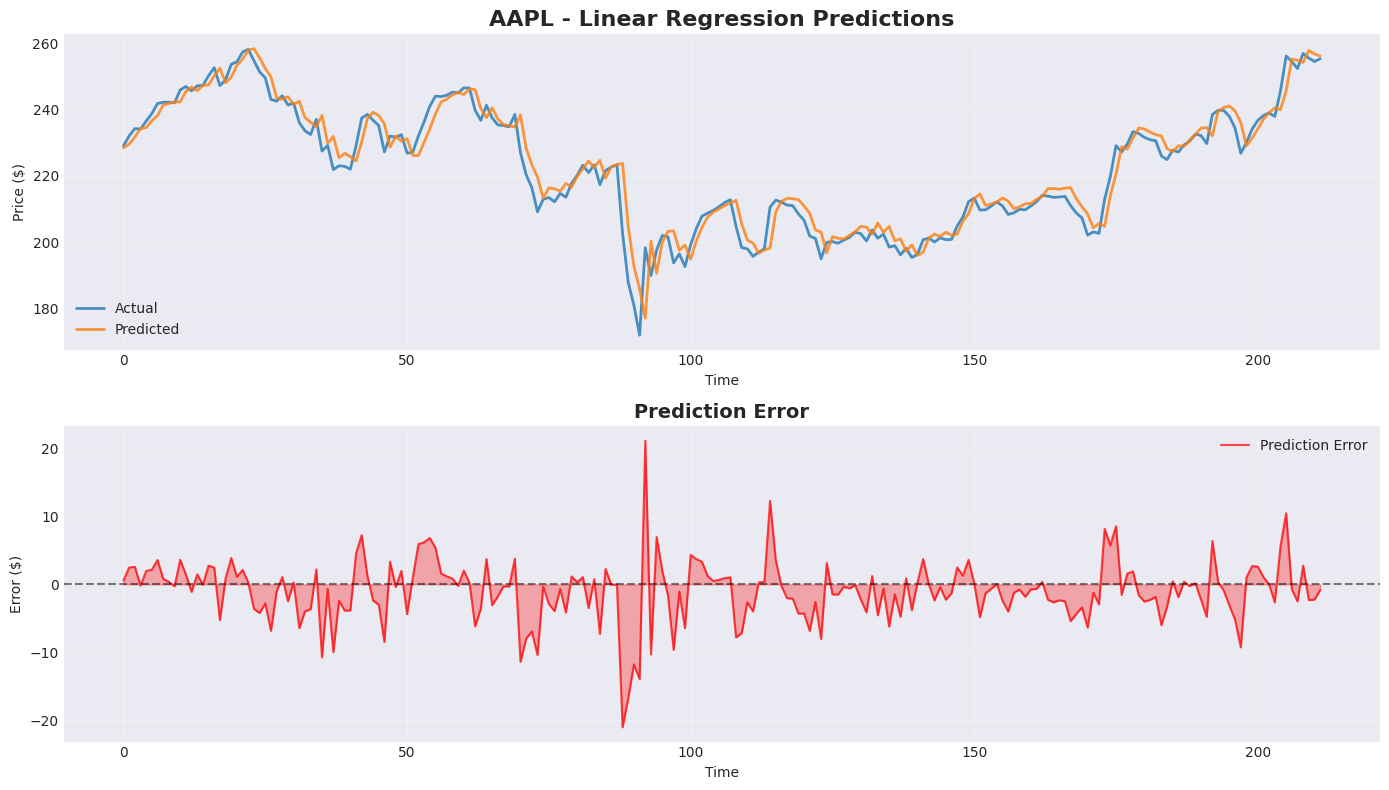

In [19]:
# Visualize predictions
viz.plot_predictions(y_test, lr_pred, TICKER, 'Linear Regression')

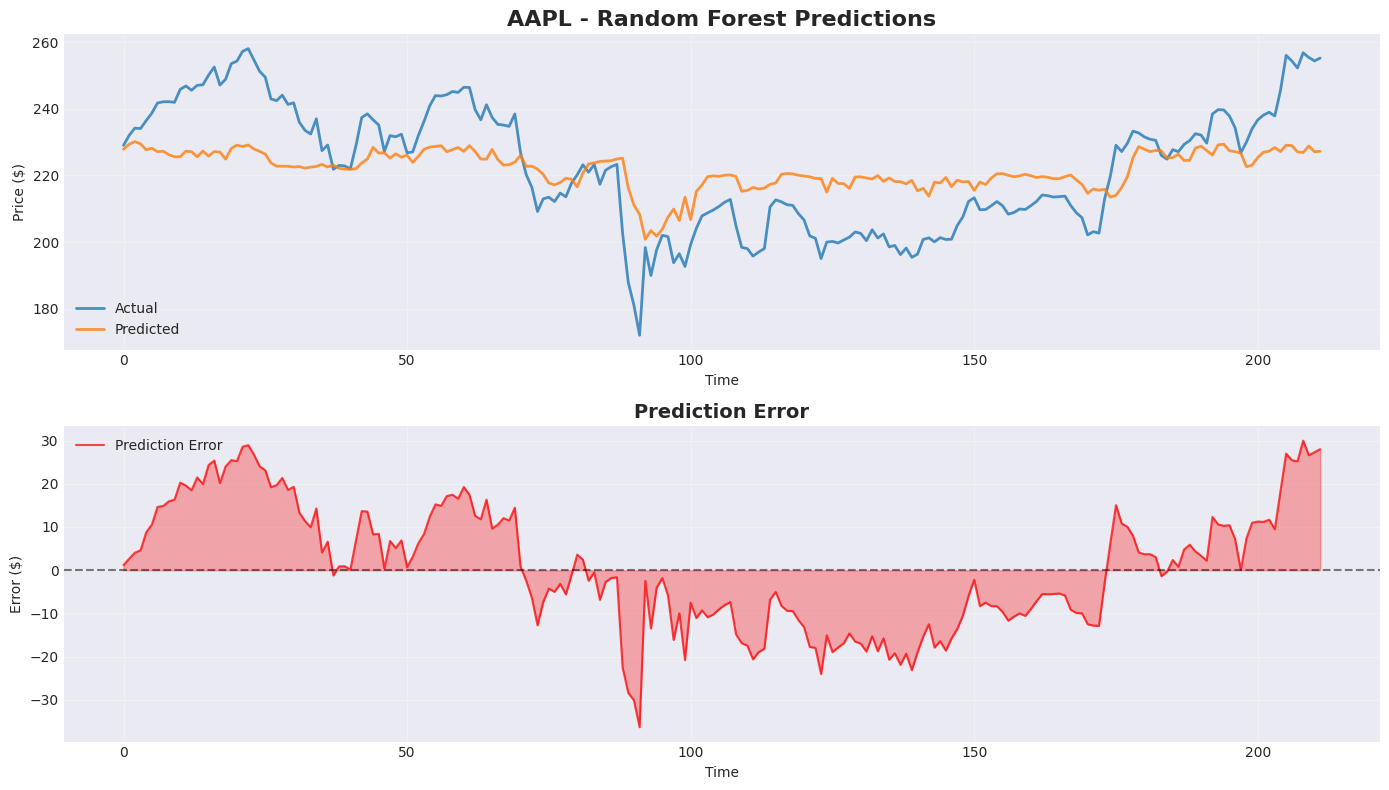

In [20]:
viz.plot_predictions(y_test, rf_pred, TICKER, 'Random Forest')

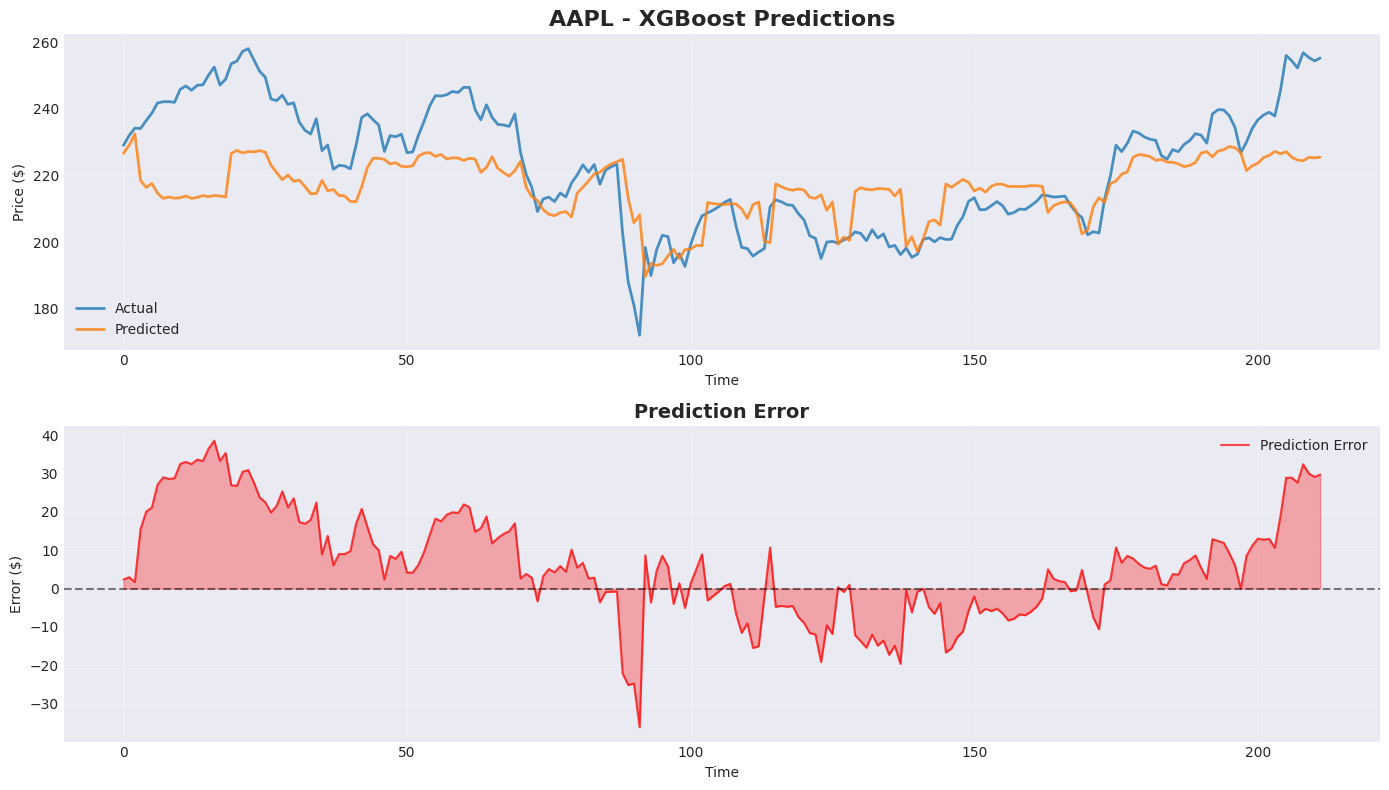

In [21]:
viz.plot_predictions(y_test, xgb_pred, TICKER, 'XGBoost')

## 7. Future Predictions

Make predictions for future dates using the best model.

In [22]:
# Use the best model (XGBoost in most cases)
# Get the latest data point
latest_features = features_df[feature_names].iloc[-1:].values
latest_scaled = xgb_model.scaler.transform(latest_features)
next_day_prediction = xgb_model.predict(latest_scaled)

print(f"Current Price: ${features_df['Close'].iloc[-1]:.2f}")
print(f"Predicted Next Day Price: ${next_day_prediction[0]:.2f}")
print(f"Expected Change: ${next_day_prediction[0] - features_df['Close'].iloc[-1]:.2f}")
print(f"Expected Change %: {((next_day_prediction[0] - features_df['Close'].iloc[-1]) / features_df['Close'].iloc[-1] * 100):.2f}%")

Current Price: $254.43
Predicted Next Day Price: $225.52
Expected Change: $-28.91
Expected Change %: -11.36%


## Conclusion

This notebook demonstrated:
- Data collection from Yahoo Finance
- Feature engineering with technical indicators
- Training multiple ML models
- Model evaluation and comparison
- Making predictions

**Remember**: Stock prediction is inherently uncertain. Use this for educational purposes only!

## 8. Try Different Stocks

Now that you understand the workflow, experiment with other stocks!

In [ ]:
# Summary of AAPL Analysis Results
print("=" * 80)
print(f"📊 STOCK ANALYSIS SUMMARY: {TICKER}")
print("=" * 80)

# Stock Information
print(f"\n🏢 COMPANY INFO:")
print(f"   Name: {info['name']}")
print(f"   Sector: {info['sector']}")
print(f"   Industry: {info['industry']}")
print(f"   Current Price: ${info['current_price']}")
print(f"   Market Cap: ${info['market_cap']:,}" if isinstance(info['market_cap'], (int, float)) else f"   Market Cap: {info['market_cap']}")

# Data Statistics
print(f"\n📈 DATA OVERVIEW:")
print(f"   Period Analyzed: {PERIOD}")
print(f"   Total Data Points: {len(df)} days")
print(f"   Date Range: {df.index[0].strftime('%Y-%m-%d')} to {df.index[-1].strftime('%Y-%m-%d')}")
print(f"   Features Created: {len(feature_names)}")
print(f"   Training/Test Split: 80/20")

# Price Statistics
print(f"\n💰 PRICE STATISTICS:")
print(f"   Current Price: ${features_df['Close'].iloc[-1]:.2f}")
print(f"   5-Year High: ${df['High'].max():.2f}")
print(f"   5-Year Low: ${df['Low'].min():.2f}")
print(f"   Average Price: ${df['Close'].mean():.2f}")
print(f"   Price Range: ${df['High'].max() - df['Low'].min():.2f}")

# Model Performance
print(f"\n🤖 MODEL PERFORMANCE:")
print(comparison_df.to_string())

print(f"\n🏆 BEST MODEL: {best_model}")
print(f"   R² Score: {comparison_df.loc[best_model, 'R2']:.4f}")
print(f"   RMSE: ${comparison_df.loc[best_model, 'RMSE']:.2f}")
print(f"   MAE: ${comparison_df.loc[best_model, 'MAE']:.2f}")
print(f"   MAPE: {comparison_df.loc[best_model, 'MAPE']:.2f}%")

# Next Day Prediction
print(f"\n🔮 NEXT DAY PREDICTION (using {best_model}):")
print(f"   Current Price: ${features_df['Close'].iloc[-1]:.2f}")
print(f"   Predicted Price: ${next_day_prediction[0]:.2f}")
change = next_day_prediction[0] - features_df['Close'].iloc[-1]
change_pct = (change / features_df['Close'].iloc[-1]) * 100
print(f"   Expected Change: ${change:.2f} ({change_pct:+.2f}%)")
print(f"   Direction: {'📈 UP' if change > 0 else '📉 DOWN'}")

# Top 5 Important Features (from Random Forest)
print(f"\n⭐ TOP 5 MOST IMPORTANT FEATURES:")
for i, row in importance.head(5).iterrows():
    print(f"   {i+1}. {row['feature']}: {row['importance']:.4f}")

print("\n" + "=" * 80)
print("✅ Analysis Complete!")
print("=" * 80)